In [1]:
from unstructured.partition.pdf import partition_pdf

In [7]:
# partition_pdf??

In [3]:
elements = partition_pdf(
    filename="data-pdf/Gastrointestinal and Liver Disease.pdf",
    strategy="hi_res",
    infer_table_structure=True,
    chunking_stratgey='by_title',
    extract_images_in_pdf=True,                       # mandatory to set as ``True``
    extract_image_block_types=["Image", "Table"],          # optional
    extract_image_block_to_payload=False,                  # optional
    extract_image_block_output_dir="extracted_data",
)

Some weights of the model checkpoint at microsoft/table-transformer-structure-recognition were not used when initializing TableTransformerForObjectDetection: ['model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
elements

In [5]:
Header=[]
Footer=[]
Title=[]
NarrativeText=[]
Text=[]
ListItem=[]
img=[]
tab=[]


for element in elements:
    if "unstructured.documents.elements.Header" in str(type(element)):
                Header.append(str(element))
    elif "unstructured.documents.elements.Footer" in str(type(element)):
                Footer.append(str(element))
    elif "unstructured.documents.elements.Title" in str(type(element)):
                Title.append(str(element))
    elif "unstructured.documents.elements.NarrativeText" in str(type(element)):
                NarrativeText.append(str(element))
    elif "unstructured.documents.elements.Text" in str(type(element)):
                Text.append(str(element))
    elif "unstructured.documents.elements.ListItem" in str(type(element)):
                ListItem.append(str(element))
    elif "unstructured.documents.elements.Image" in str(type(element)):
            img.append(str(element))
    elif "unstructured.documents.elements.Table" in str(type(element)):
            tab.append(str(element))
    

In [6]:
print(len(Header))
print(len(Footer))
print(len(Title))
print(len(NarrativeText))
print(len(Text))
print(len(ListItem))
print(len(img))
print(len(tab))

358
3
1425
2358
420
1295
608
50


In [8]:
data = {
"Header": Header,
"Footer": Footer,
"Title": Title,
"NarrativeText": NarrativeText,
"Text": Text,
"ListItem": ListItem,
"img": img,
"tab": tab
}

# Save the elements as json file

In [9]:
import json

with open("unsrtuctured_result_data.json", "w") as json_file:
    json.dump(data, json_file)

In [10]:
with open("unsrtuctured_result_data.json", "r") as json_file:
    saved_data = json.load(json_file)

In [11]:
new_Header = data.get("Header", [])
new_Footer = data.get("Footer", [])
new_Title = data.get("Title", [])
new_NarrativeText = data.get("NarrativeText", [])
new_Text = data.get("Text", [])
new_ListItem = data.get("ListItem", [])
new_img = data.get("img", [])
new_tab = data.get("tab", [])

In [42]:
len(NarrativeText)

2358

In [27]:
NarrativeText[10]

'As discussed in Chapters 51 and 52, Hp causes an antrum- predominant gastritis in 10% to 20% of infected patients, which results in high gastric acid secretion and an increased risk of DU. The increased acid output from the stomach results in increased acid load to the duodenum that can result in gastric metaplasia in the duodenal bulb.12 Some believe that the metaplastic epithe- lium then becomes infected with Hp from the stomach, resulting in focal “duodenitis” (technically, gastritis), sometimes followed by erosion and ulcer formation.'

In [32]:
total_characters = sum(len(item) for item in NarrativeText)

In [33]:
total_characters

983129

In [34]:
total_words = sum(len(item.split()) for item in NarrativeText)

In [35]:
total_words

147198

In [37]:
avg_words_list = total_words / len(NarrativeText) if NarrativeText else 0

In [38]:
avg_words_list

62.42493638676845

In [39]:
avg_char_list = total_characters / len(NarrativeText) if NarrativeText else 0

In [40]:
avg_char_list

416.9334181509754

In [16]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI

# Table Summary

In [17]:
prompt_text = """You are an assistant tasked with summarizing tables for retrieval. \
    These summaries will be embedded and used to retrieve the raw table elements. \
    Give a concise summary of the table that is well optimized for retrieval. Table:{element} """

In [18]:
prompt = ChatPromptTemplate.from_template(prompt_text)

In [19]:
OPENAI_API_TOKEN = "sk-3j0cFKF5cjjHnmR1rwm2NlxYno3Dalko6m9LM0lImeT3BlbkFJ3JUoGhG7POjgKJ_YjWG2f6FT3blA5IF_a6FuLLFa0A"

In [21]:
import os
os.environ["OPENAI_API_KEY"] = OPENAI_API_TOKEN

In [22]:
# Text summary chain
model = ChatOpenAI(temperature=0, model="gpt-4")
summarize_chain = {"element": lambda x: x} | prompt | model | StrOutputParser()

In [23]:
table_summaries = []
table_summaries = summarize_chain.batch(tab, {"max_concurrency": 5})

In [24]:
table_summaries[0]

'The table provides comprehensive information on peptic ulcer disease, covering aspects such as epidemiology, etiology, pathogenesis, clinical features, diagnosis, and medical therapy. It discusses the role of Hp infection, use of aspirin and other NSAIDs, and other causes in the development of ulcers. The table also details various pharmaceutical agents used in the treatment of active peptic ulcer disease, including those for Hp-associated ulcers, NSAID ulcers, and idiopathic ulcers. It further addresses refractory ulcers, prevention strategies, and complications like bleeding, perforation, and obstruction. The table concludes with a section on stress ulcers.'

In [25]:
tab[0]

'EPIDEMIOLOGY � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � 806 ETIOLOGY AND PATHOGENESIS � � � � � � � � � � � � � � � � � � � � 806 Hp Infection � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � 807 Use of Aspirin and Other NSAIDs � � � � � � � � � � � � � � � � � � 807 Other Causes of Ulcers and Idiopathic Ulcers � � � � � � � � � 808 CLINICAL FEATURES AND DIAGNOSIS � � � � � � � � � � � � � � � 808 MEDICAL THERAPY OF ACTIVE PEPTIC ULCER DISEASE � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � 810 Pharmaceutical Agents � � � � � � � � � � � � � � � � � � � � � � � � � 810 Hp-associated Ulcers � � � � � � � � � � � � � � � � � � � � � � � � � � 811 NSAID Ulcers � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � � 812 Other Causes of Ulcers and Idiopathic Ulcers � � � � � � � � � 812 REFRACTORY ULCERS � � � � � � � � � � � � � � � � � � � � � � � � � � � 812 PREVENTION OF ULCER DISEASE � � � � � � � � � � � � 

# Text Summary

In [26]:
# Prompt
prompt_text = """You are an assistant tasked with summarizing text for retrieval. \
    These summaries will be embedded and used to retrieve the raw text elements. \
    Give a concise summary of the table or text that is well optimized for retrieval.text: {element} """


In [27]:
prompt = ChatPromptTemplate.from_template(prompt_text)

In [42]:
# Text summary chain
model = ChatOpenAI(temperature=0, model="gpt-4-turbo")
summarize_chain = {"element": lambda x: x} | prompt | model | StrOutputParser()

In [43]:
# Initialize empty summaries

text_summaries = []
text_summaries = summarize_chain.batch(NarrativeText, {"max_concurrency": 5})

In [ ]:
text_summaries

# Image Summary

In [45]:
import base64
import os
from langchain_core.messages import HumanMessage

In [46]:
def encode_image(image_path):
    """Getting the base64 string"""
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")

In [53]:
def image_summarize(img_base64, prompt):
    """Make image summary"""
    chat = ChatOpenAI(model="gpt-4-turbo", max_tokens=1024)

    msg = chat.invoke(
        [
            HumanMessage(
                content=[
                    {"type": "text", "text": prompt},
                    {
                        "type": "image_url",
                        "image_url": {"url": f"data:image/jpeg;base64,{img_base64}"},
                    },
                ]
            )
        ]
    )
    return msg.content

In [54]:
def generate_img_summaries(path):
    """
    Generate summaries and base64 encoded strings for images
    path: Path to list of .jpg files extracted by Unstructured
    """

    # Store base64 encoded images
    img_base64_list = []

    # Store image summaries
    image_summaries = []

    # Prompt
    prompt = """You are an assistant tasked with summarizing images for retrieval. \
    These summaries will be embedded and used to retrieve the raw image. \
    Give a concise summary of the image that is well optimized for retrieval."""

    # Apply to images
    for img_file in sorted(os.listdir(path)):
        if img_file.endswith(".jpg"):
            img_path = os.path.join(path, img_file)
            base64_image = encode_image(img_path)
            img_base64_list.append(base64_image)
            image_summaries.append(image_summarize(base64_image, prompt))


    return img_base64_list, image_summaries

In [55]:
fpath="extracted_images/"

In [56]:
# Image summaries
img_base64_list, image_summaries = generate_img_summaries(fpath)

In [ ]:
image_summaries

# Multivector Retriver

In [59]:
import uuid

from langchain.retrievers.multi_vector import MultiVectorRetriever
from langchain.storage import InMemoryStore
from langchain_community.vectorstores import Chroma
from langchain_core.documents import Document
from langchain_openai import OpenAIEmbeddings

In [60]:
def create_multi_vector_retriever(vectorstore, text_summaries, texts, table_summaries, tables, image_summaries, images):
    """
    Create retriever that indexes summaries, but returns raw images or texts
    """

    # Initialize the storage layer
    store = InMemoryStore()
    id_key = "doc_id"

    # Create the multi-vector retriever
    retriever = MultiVectorRetriever(
        vectorstore=vectorstore,
        docstore=store,
        id_key=id_key,
    )


    # Helper function to add documents to the vectorstore and docstore
    def add_documents(retriever, doc_summaries, doc_contents):

      doc_ids = [str(uuid.uuid4()) for _ in doc_contents]

      summary_docs = [
              Document(page_content=s, metadata={id_key: doc_ids[i]})
              for i, s in enumerate(doc_summaries)
          ]

      retriever.vectorstore.add_documents(summary_docs)
      retriever.docstore.mset(list(zip(doc_ids, doc_contents)))

      # Add texts, tables, and images
      # Check that text_summaries is not empty before adding
      if text_summaries:
          add_documents(retriever, text_summaries, texts)
      # Check that table_summaries is not empty before adding
      if table_summaries:
          add_documents(retriever, table_summaries, tab)
      # Check that image_summaries is not empty before adding
      if image_summaries:
          add_documents(retriever, image_summaries, img)

    return retriever

vectorstore = Chroma(
    collection_name="mm_rag", embedding_function=OpenAIEmbeddings()
)

# Create retriever
retriever_multi_vector_img = create_multi_vector_retriever(
    vectorstore,
    text_summaries,
    NarrativeText,
    table_summaries,
    tab,
    image_summaries,
    img_base64_list,
)

/tmp/ipykernel_9988/437797437.py:44: LangChainDeprecationWarning: The class `Chroma` was deprecated in LangChain 0.2.9 and will be removed in 1.0. An updated version of the class exists in the langchain-chroma package and should be used instead. To use it run `pip install -U langchain-chroma` and import as `from langchain_chroma import Chroma`.
  vectorstore = Chroma(


In [61]:
retriever_multi_vector_img

MultiVectorRetriever(vectorstore=<langchain_community.vectorstores.chroma.Chroma object at 0x7fa1eff26800>, docstore=<langchain_core.stores.InMemoryStore object at 0x7fa1ed0c7520>)

In [62]:
import io
import re

from IPython.display import HTML, display
from PIL import Image

In [63]:
def plt_img_base64(img_base64):
    """Disply base64 encoded string as image"""
    # Create an HTML img tag with the base64 string as the source
    image_html = f'<img src="data:image/jpeg;base64,{img_base64}" />'
    # Display the image by rendering the HTML
    display(HTML(image_html))



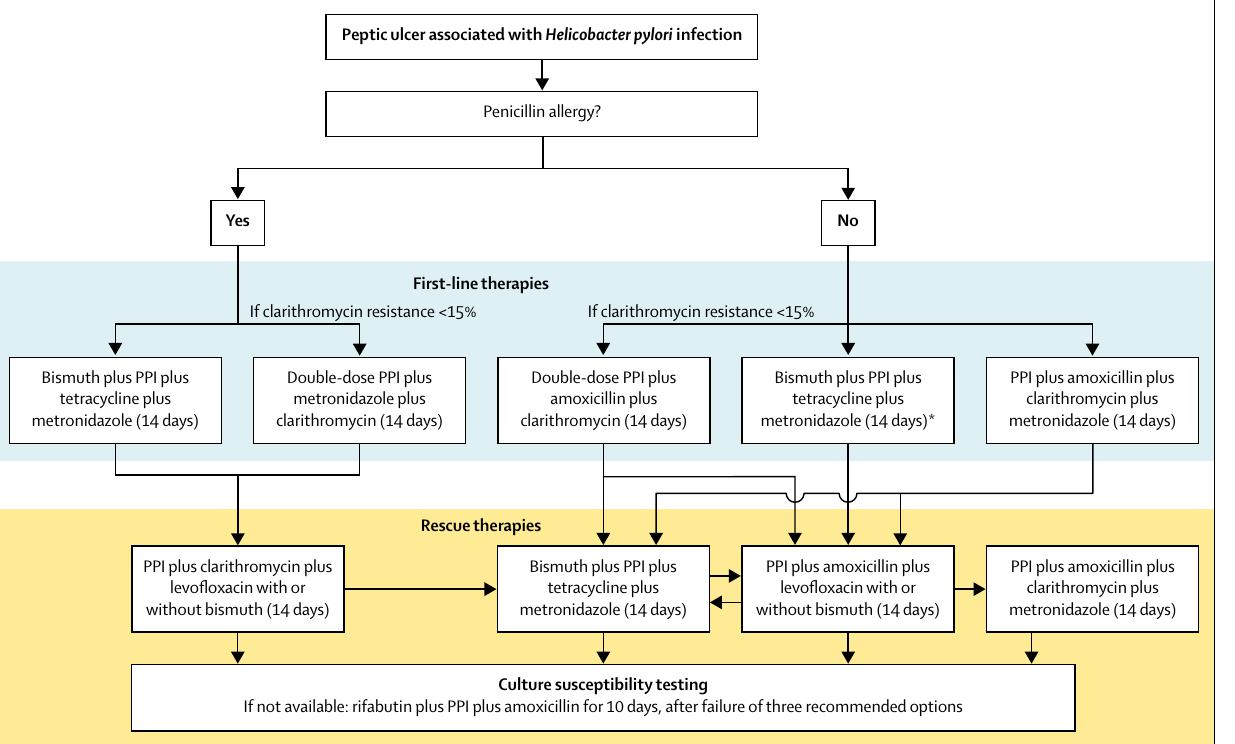

In [66]:
plt_img_base64(img_base64_list[30])

In [67]:
image_summaries[30]

'This image is a flowchart detailing treatment options for peptic ulcer associated with Helicobacter pylori infection based on penicillin allergy status and clarithromycin resistance. It outlines first-line therapies including combinations of Bismuth, PPI, tetracycline, metronidazole, amoxicillin, and clarithromycin, depending on the allergy status and resistance levels. For cases where the initial treatment fails, rescue therapies and culture susceptibility testing are suggested with various drug combinations listed for a duration of 14 days. The flowchart is organized with decision points and subsequent treatment pathways to guide medical treatment decisions.'

In [68]:
def looks_like_base64(sb):
    """Check if the string looks like base64"""
    return re.match("^[A-Za-z0-9+/]+[=]{0,2}$", sb) is not None


In [69]:
def is_image_data(b64data):
    """
    Check if the base64 data is an image by looking at the start of the data
    """
    image_signatures = {
        b"\xFF\xD8\xFF": "jpg",
        b"\x89\x50\x4E\x47\x0D\x0A\x1A\x0A": "png",
        b"\x47\x49\x46\x38": "gif",
        b"\x52\x49\x46\x46": "webp",
    }
    try:
        header = base64.b64decode(b64data)[:8]  # Decode and get the first 8 bytes
        for sig, format in image_signatures.items():
            if header.startswith(sig):
                return True
        return False
    except Exception:
        return False

In [70]:
def resize_base64_image(base64_string, size=(128, 128)):
    """
    Resize an image encoded as a Base64 string
    """
    # Decode the Base64 string
    img_data = base64.b64decode(base64_string)
    img = Image.open(io.BytesIO(img_data))

    # Resize the image
    resized_img = img.resize(size, Image.LANCZOS)

    # Save the resized image to a bytes buffer
    buffered = io.BytesIO()
    resized_img.save(buffered, format=img.format)

    # Encode the resized image to Base64
    return base64.b64encode(buffered.getvalue()).decode("utf-8")

In [71]:
def split_image_text_types(docs):
    """
    Split base64-encoded images and texts
    """
    b64_images = []
    texts = []

    for doc in docs:
        # Check if the document is of type Document and extract page_content if so
        if isinstance(doc, Document):
            doc = doc.page_content
        if looks_like_base64(doc) and is_image_data(doc):
            doc = resize_base64_image(doc, size=(1300, 600))
            b64_images.append(doc)
        else:
            texts.append(doc)

    return {"images": b64_images, "texts": texts}

In [72]:
def img_prompt_func(data_dict):
    """
    Join the context into a single string
    """
    #print(data_dict)
    formatted_texts = "\n".join(data_dict["context"]["texts"])
    messages = []

    # Adding image(s) to the messages if present
    if data_dict["context"]["images"]:
        for image in data_dict["context"]["images"]:
            image_message = {
                "type": "image_url",
                "image_url": {"url": f"data:image/jpeg;base64,{image}"},
            }
            messages.append(image_message)

    # Adding the text for analysis
    text_message = {
        "type": "text",
        "text": (
            "You are a helpful assistant.\n"
            "You will be given a mixed info(s) .\n"
            "Use this information to provide relevant information to the user question. \n"
            f"User-provided question: {data_dict['question']}\n\n"
            "Text and / or tables:\n"
            f"{formatted_texts}"
        ),
    }
    messages.append(text_message)
    return [HumanMessage(content=messages)]

In [73]:
from langchain_core.runnables import RunnableLambda, RunnablePassthrough

In [76]:
def multi_modal_rag_chain(retriever):
    """
    Multi-modal RAG chain
    """

    # Multi-modal LLM
    model = ChatOpenAI(temperature=0, model="gpt-4-turbo")


    # RAG pipeline
    chain = (
        {
            "context": retriever | RunnableLambda(split_image_text_types),
            "question": RunnablePassthrough(),
        }
        | RunnableLambda(img_prompt_func)
        | model
        | StrOutputParser()
    )

    return chain

In [77]:
# Create RAG chain
chain_multimodal_rag = multi_modal_rag_chain(retriever_multi_vector_img)

In [78]:
chain_multimodal_rag

{
  context: MultiVectorRetriever(vectorstore=<langchain_community.vectorstores.chroma.Chroma object at 0x7fa1eff26800>, docstore=<langchain_core.stores.InMemoryStore object at 0x7fa1ed0c7520>)
           | RunnableLambda(split_image_text_types),
  question: RunnablePassthrough()
}
| RunnableLambda(img_prompt_func)
| ChatOpenAI(client=<openai.resources.chat.completions.Completions object at 0x7fa1ed0c4070>, async_client=<openai.resources.chat.completions.AsyncCompletions object at 0x7fa1eee804f0>, root_client=<openai.OpenAI object at 0x7fa1ee844730>, root_async_client=<openai.AsyncOpenAI object at 0x7fa1ed0c74c0>, model_name='gpt-4-turbo', temperature=0.0, openai_api_key=SecretStr('**********'), openai_proxy='')
| StrOutputParser()

In [95]:
# Check retrieval
query = "explain treatment options for peptic ulcer based on penicillin allergy"
docs = retriever_multi_vector_img.invoke(query)



In [96]:
docs

[]

# RAG

In [81]:
query="Are gastric ulcers hereditary?"

In [83]:
# Run RAG chain
result = chain_multimodal_rag.invoke(query)

In [84]:
print(result)

Gastric ulcers, also known as peptic ulcers, are sores that develop on the lining of the stomach, lower esophagus, or small intestine. They occur when the stomach's protective mucus is reduced and allows the acidic digestive juices to erode the organ's tissue.

The development of gastric ulcers is not directly hereditary, meaning they are not passed down from parents to children through genes. However, certain genetic factors may increase a person's susceptibility to the H. pylori bacteria, which is known to be a major cause of ulcers. Additionally, genetic predispositions to excessive acid production or weaker stomach lining protection could increase the risk of developing ulcers.

Other factors that contribute to the development of gastric ulcers include:
- Frequent use of nonsteroidal anti-inflammatory drugs (NSAIDs), like ibuprofen and aspirin.
- Smoking cigarettes and drinking alcohol.
- Stress, although it is not a direct cause, can exacerbate symptoms and slow the healing proces

In [85]:
questions_text = """
What is a gastric ulcer?
What causes gastric ulcers?
How does H. pylori infection contribute to gastric ulcers?
What are the common symptoms of a gastric ulcer?
How are gastric ulcers and duodenal ulcers different?
What risk factors increase the likelihood of developing a gastric ulcer?
Can stress cause gastric ulcers?
How is a gastric ulcer diagnosed?
What tests are used to detect H. pylori infection?
Are gastric ulcers hereditary?
Can smoking contribute to gastric ulcers?
How do NSAIDs (nonsteroidal anti-inflammatory drugs) cause gastric ulcers?
Can alcohol consumption lead to gastric ulcers?
What lifestyle changes can help prevent gastric ulcers?
How does diet affect gastric ulcers?
What are the common treatments for gastric ulcers?
How effective are antibiotics in treating H. pylori-related ulcers?
How long does it typically take for a gastric ulcer to heal?
Are there any dietary changes recommended for someone with a gastric ulcer?
What foods should be avoided if you have a gastric ulcer?
Can lifestyle changes such as quitting smoking help with gastric ulcers?
What are the potential side effects of ulcer medications?
How often should I follow up with my doctor if I have a gastric ulcer?
Can gastric ulcers recur after treatment?
How do proton pump inhibitors (PPIs) work to treat gastric ulcers?
Is surgery ever required to treat a gastric ulcer?
What are the long-term effects of untreated gastric ulcers?
What are the signs that a gastric ulcer is bleeding?
How serious is a bleeding gastric ulcer?
What should I do if I suspect my gastric ulcer is bleeding?
Can a gastric ulcer lead to other complications such as perforation or obstruction?
How is a bleeding gastric ulcer treated in an emergency?
What are the symptoms of a perforated gastric ulcer?
How is a perforated gastric ulcer treated?
How does anemia relate to gastric ulcers?
Can chronic stomach ulcers lead to gastric cancer?
Are there any ways to prevent gastric ulcers?
How can I reduce my risk of developing a gastric ulcer?
Can long-term use of NSAIDs cause gastric ulcers?
What are the alternatives to NSAIDs if I have a history of gastric ulcers?
How often should I get screened for H. pylori if I've had a gastric ulcer before?
Are there any new treatments or research developments for gastric ulcers?
How does gastric acid secretion influence the formation of stomach ulcers?
What role do prostaglandins play in the pathophysiology of stomach ulcers?
How is the urea breath test used to diagnose H. pylori infection?
What are the mechanisms of action of proton pump inhibitors (PPIs) in ulcer treatment?
How do NSAIDs induce gastric mucosal injury leading to ulcers?
What is the role of endoscopy in the management of peptic ulcer disease?
How do you assess the severity of bleeding in a peptic ulcer patient?
What are the indications for surgical intervention in peptic ulcer disease?
How does H. pylori eradication therapy affect the recurrence of stomach ulcers?
How are refractory peptic ulcers managed clinically?
What are the long-term outcomes of patients with peptic ulcer bleeding?
How does chronic use of corticosteroids influence peptic ulcer formation?
How do you differentiate between benign and malignant gastric ulcers during endoscopy?
How do you manage patients with non-healing gastric ulcers despite standard treatment?
What are the indications for endoscopic biopsy in patients with suspected gastric ulcers?
How do you approach the treatment of gastric ulcers in patients with concurrent liver disease?
How do you tailor the treatment of peptic ulcers in elderly patients with multiple comorbidities?
What is your approach to managing patients with peptic ulcers who are on anticoagulant therapy?
What are the current guidelines for the use of proton pump inhibitors (PPIs) in peptic ulcer disease?
How do you handle cases of refractory H. pylori infection that do not respond to standard eradication regimens?
Is a bleeding gastric ulcer a sign of stomach cancer?
Where does acute pain from a gastric ulcer typically manifest?
What are the differences between gastritis, gastric erosion, and gastric ulcers?
Can black stool indicate a gastric ulcer?
What is the purpose of performing a tissue biopsy in cases of gastric ulcers?
What is the Sakita classification in gastric ulcers?
Could vomiting blood indicate a gastric ulcer?
Are there any significant blood test results when a patient has a gastric ulcer?
"""

In [86]:
questions_list = [question.astrip() for question in questions_text.strip().split('\n') if question]

In [87]:
print(questions_list)

['What is a gastric ulcer?', 'What causes gastric ulcers?', 'How does H. pylori infection contribute to gastric ulcers?', 'What are the common symptoms of a gastric ulcer?', 'How are gastric ulcers and duodenal ulcers different?', 'What risk factors increase the likelihood of developing a gastric ulcer?', 'Can stress cause gastric ulcers?', 'How is a gastric ulcer diagnosed?', 'What tests are used to detect H. pylori infection?', 'Are gastric ulcers hereditary?', 'Can smoking contribute to gastric ulcers?', 'How do NSAIDs (nonsteroidal anti-inflammatory drugs) cause gastric ulcers?', 'Can alcohol consumption lead to gastric ulcers?', 'What lifestyle changes can help prevent gastric ulcers?', 'How does diet affect gastric ulcers?', 'What are the common treatments for gastric ulcers?', 'How effective are antibiotics in treating H. pylori-related ulcers?', 'How long does it typically take for a gastric ulcer to heal?', 'Are there any dietary changes recommended for someone with a gastric 

In [88]:
answers_dict = {}

In [89]:
for question in questions_list:
    result = chain_multimodal_rag.invoke(question)
    answers_dict[question] = result

In [90]:
import pandas as pd
df = pd.DataFrame(list(answers_dict.items()), columns=['Question', 'Answer'])

In [91]:
df.to_csv('gastric_ulcer_questions_answers.csv', index=False)

In [93]:
df

,Question,Answer
0,What is a gastric ulcer?,"A gastric ulcer, also known as a stomach ulcer..."
1,What causes gastric ulcers?,"Gastric ulcers, also known as stomach ulcers, ..."
2,How does H. pylori infection contribute to gas...,Helicobacter pylori (H. pylori) infection cont...
3,What are the common symptoms of a gastric ulcer?,Common symptoms of a gastric ulcer include:\n\...
4,How are gastric ulcers and duodenal ulcers dif...,Gastric ulcers and duodenal ulcers are both ty...
...,...,...
65,Can black stool indicate a gastric ulcer?,"Yes, black stool can be an indication of a gas..."
66,What is the purpose of performing a tissue bio...,A tissue biopsy in the case of gastric ulcers ...
67,What is the Sakita classification in gastric u...,The Sakita classification is a system used to ...
68,Could vomiting blood indicate a gastric ulcer?,"Yes, vomiting blood can indeed indicate a gast..."


In [94]:
df.to_excel('gastric_ulcer_questions_answers_excel.xlsx', index=False)